In [2]:
import pandas as pd
from sklearn import metrics, ensemble, model_selection, tree
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_excel('Test_OOA.xlsx', index_col='ID заявки')

В Банке N оформляются кредитные заявки. На момент оформления заявки (до ее одобрения) известны все атрибуты из списка ниже, кроме атрибута «Флаг». Значения «Флаг» были проставлены после дополнительных проверок заявок: 0 – заявка «хорошая», 1 – «плохая». В файле Test_OOA (во вложении) – список кредитных заявок за некоторый период в прошлом со следующими атрибутами (все значения атрибутов в файле следует считать обезличенными категориями, а не численными значениями):

•	ID заявки – номер заявки
•	Тип точки продаж – характеристика места оформления заявки
•	Кредит_1 – характеристика кредитной заявки
•	Кредит_2 – характеристика кредитной заявки
•	Кредит_3 – характеристика кредитной заявки
•	Клиент_1 – характеристика клиента
•	Клиент_2 – характеристика клиента 
•	Клиент_3 – характеристика клиента
•	Клиент_4 – характеристика клиента
•	Клиент_5 – характеристика клиента
•	Клиент_6 – характеристика клиента
•	Клиент_7 – характеристика клиента
•	Флаг – для всех заявок из файла уже известно значение атрибута «Флаг» (0 или 1).

Пусть в Банке N есть ресурсы на дополнительные проверки не более чем 1/3 количества от всех поступающих заявок. Требуется найти сегмент объемом не более 1/3 от всех заявок, который содержит наибольшее количество «плохих» заявок, и описать правило в терминах атрибутов, согласно которому заявки из этого сегмента будут отправляться на дополнительную проверку (необязательно включать в правило все атрибуты из данного списка).

Предлагается записать правило в виде одного или нескольких «сегментов», где «сегмент» характеризуется правилом вида «Параметр_1 in [...] AND Параметр_2 in […] AND … AND Параметр_k in […]», т.е. используя операторы in и AND, где Параметр_i – атрибут из списка {Тип точки продаж, Кредит_1, Кредит_2, Кредит_3, Клиент_1, Клиент_2, Клиент_3, Клиент_4, Клиент_5, Клиент_6, Клиент_7}.

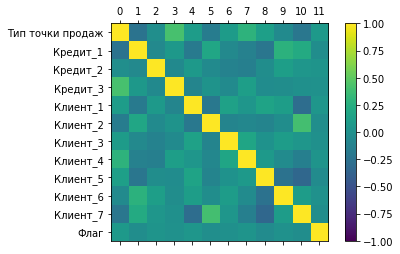

In [4]:
names = ['Тип точки продаж', 'Кредит_1', 'Кредит_2', 'Кредит_3', 'Клиент_1', 
         'Клиент_2', 'Клиент_3', 'Клиент_4', 'Клиент_5', 'Клиент_6', 'Клиент_7', 'Флаг']
correlations = data.corr('pearson')
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,12,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticks)
ax.set_yticklabels(names)
plt.show()

In [48]:
data.count()/3

Тип точки продаж    24801.666667
Кредит_1            24801.666667
Кредит_2            24801.666667
Kредит_3            24801.666667
Клиент_1            24801.666667
Клиент_2            24801.666667
Клиент_3            24801.666667
Клиент_4            24801.666667
Клиент_5            24801.666667
Клиент_6            24801.666667
Клиент_7            24801.666667
Флаг                24801.666667
dtype: float64

In [5]:
x = data.drop(['Флаг'], axis=1)
y = data[['Флаг']]

In [6]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.33)

In [55]:
rf = tree.DecisionTreeClassifier(max_depth=5, min_samples_leaf=11000, min_samples_split = 3)
#parametrs = {'max_depth' : 5, 'min_samples_split' : 2, 'min_samples_leaf' : 2}
#rs = model_selection.RandomizedSearchCV(rf, parametrs, cv=3, n_jobs=-1)
rf.fit(x_train,y_train.values.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=11000, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [56]:
plt.figure(figsize=(60, 60),dpi=180)
p = tree.plot_tree(rf, fontsize=44,filled=True,feature_names=list(x))

In [ ]:
Клиент_6 > 9.5 and Тип точки продаж > 6.5